Optimal alpha: 0.9973407513835608
Japan's Economic Growth Analysis with Optimal Alpha:
   Year  GDP_Growth  Capital_Growth  Labor_Growth  TFP_Growth
0  2018    0.000000        0.000000      0.000000    0.000000
1  2019    0.020000        0.016667     -0.007692    0.003398
2  2020   -0.029412        0.016393     -0.007752   -0.045741
3  2021    0.050505        0.032258     -0.007812    0.018354
4  2022    0.038462        0.031250     -0.007874    0.007316


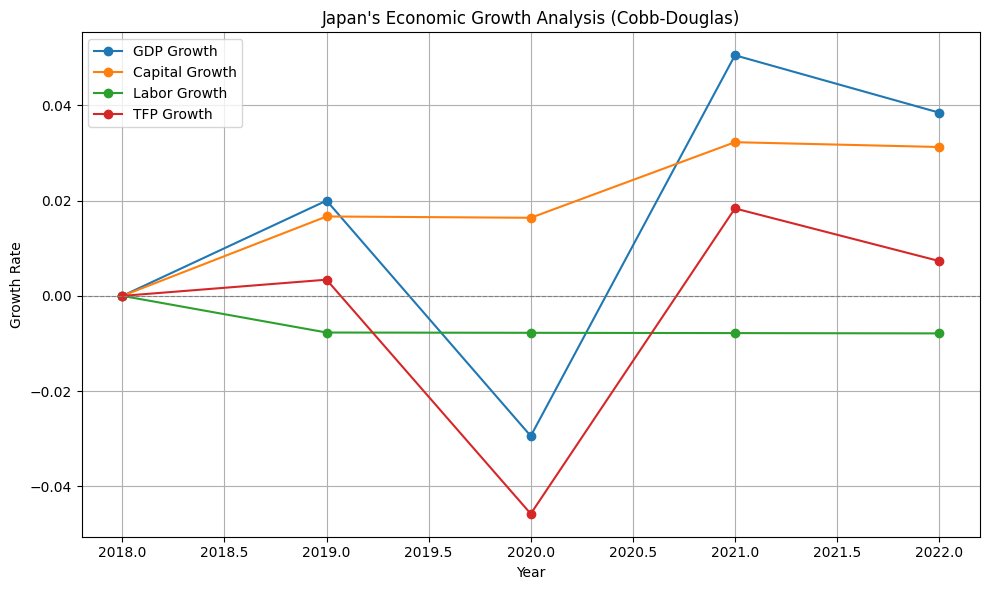

In [1]:
from scipy.optimize import minimize
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Example data for Japan (replace with actual data)
data = {
    'Year': [2018, 2019, 2020, 2021, 2022],
    'GDP': [5000, 5100, 4950, 5200, 5400],  # GDP in billion USD
    'Capital': [3000, 3050, 3100, 3200, 3300],  # Capital in billion USD
    'Labor': [65, 64.5, 64, 63.5, 63]  # Labor in millions
}
df = pd.DataFrame(data)

# Calculate growth rates
df['GDP_Growth'] = df['GDP'].pct_change().fillna(0)
df['Capital_Growth'] = df['Capital'].pct_change().fillna(0)
df['Labor_Growth'] = df['Labor'].pct_change().fillna(0)

# Define the loss function
def loss_function(alpha):
    '''
    Loss function to minimize the error between observed and predicted GDP growth.
    :param alpha: Output elasticity of capital.
    :return: Mean squared error.
    '''
    predicted_gdp_growth = alpha * df['Capital_Growth'] + (1 - alpha) * df['Labor_Growth']
    mse = np.mean((df['GDP_Growth'] - predicted_gdp_growth) ** 2)
    return mse

# Initial guess for alpha
initial_alpha = 0.4

# Minimize the loss function
result = minimize(loss_function, initial_alpha, bounds=[(0, 1)])  # Alpha is bounded between 0 and 1

# Optimal alpha
optimal_alpha = result.x[0]
print(f"Optimal alpha: {optimal_alpha}")

# Calculate TFP growth using the optimal alpha
df['TFP_Growth'] = df['GDP_Growth'] - optimal_alpha * df['Capital_Growth'] - (1 - optimal_alpha) * df['Labor_Growth']

# Display results
print("Japan's Economic Growth Analysis with Optimal Alpha:")
print(df[['Year', 'GDP_Growth', 'Capital_Growth', 'Labor_Growth', 'TFP_Growth']])

# Visualization
plt.figure(figsize=(10, 6))

# Plot GDP, Capital, Labor, and TFP growth rates
plt.plot(df['Year'], df['GDP_Growth'], label='GDP Growth', marker='o')
plt.plot(df['Year'], df['Capital_Growth'], label='Capital Growth', marker='o')
plt.plot(df['Year'], df['Labor_Growth'], label='Labor Growth', marker='o')
plt.plot(df['Year'], df['TFP_Growth'], label='TFP Growth', marker='o')

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.title("Japan's Economic Growth Analysis (Cobb-Douglas)")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)  # Add a horizontal line at 0
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()